In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

11304960/11490434 [============================>.] - ETA: 0s

In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [5]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [6]:
input_img= Input(shape=(784,))

In [7]:
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

In [8]:
autoencoder=Model(input_img, decoded)

In [9]:
encoder = Model(input_img, encoded)

In [10]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

In [ ]:
encoder.summary()

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.2495 - acc: 0.7839 - val_loss: 0.1668 - val_acc: 0.7990
Epoch 2/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.1506 - acc: 0.8048 - val_loss: 0.1371 - val_acc: 0.8067
Epoch 3/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1316 - acc: 0.8086 - val_loss: 0.1251 - val_acc: 0.8100
Epoch 4/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1217 - acc: 0.8102 - val_loss: 0.1169 - val_acc: 0.8102
Epoch 5/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.1157 - acc: 0.8111 - val_loss: 0.1118 - val_acc: 0.8109
Epoch 6/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1115 - acc: 0.8117 - val_loss: 0.1077 - val_acc: 0.8112
Epoch 7/50
60000/60000 [==============================] - 6s 106us/step - 

In [0]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

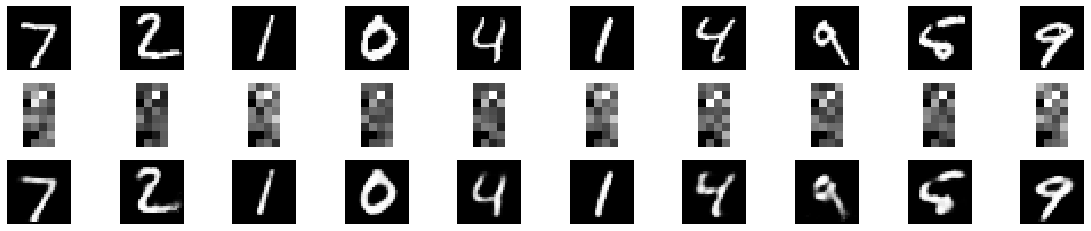

In [0]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()